<a href="https://colab.research.google.com/github/Player1ce/CS461-BCI/blob/main/EEG_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [ ]:
# !pip install {package-name}
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
from scipy.integrate import simps
import seaborn as sns
import pandas as pd
from scipy import signal


**Helper Funtions**

In [ ]:

def get_window(signal, start, end):
  return signal[start:end]

def read_csv(fileURL, channel):
  raw_signal = pd.read_csv(fileURL,  sep=',', usecols = [channel])
  sampleFreq = 512
  seconds = len(raw_signal) / sampleFreq
  t = np.linspace(0, seconds, len(raw_signal), endpoint=False)  # https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
  return t , raw_signal




**plotRawEEG(fileURL, channel)**

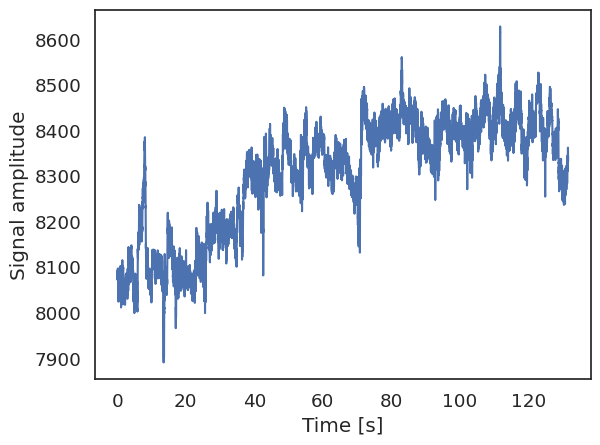

In [ ]:
def plotRawEEG(fileURL, channel):
  x_intervals, signal = read_csv(fileURL, channel)

  # Plot
  fig, ax = plt.subplots()
  ax.plot(x_intervals, signal)
  ax.set_xlabel('Time [s]')
  ax.set_ylabel('Signal amplitude');

dataUrl = "https://raw.githubusercontent.com/htil/Simple-Ganglion-BLE-App/master/data/practice_eeg_512Hz.csv"

plotRawEEG(dataUrl, 0)

**plotPSD(fileURL, channel, psdWindowSize=4)**

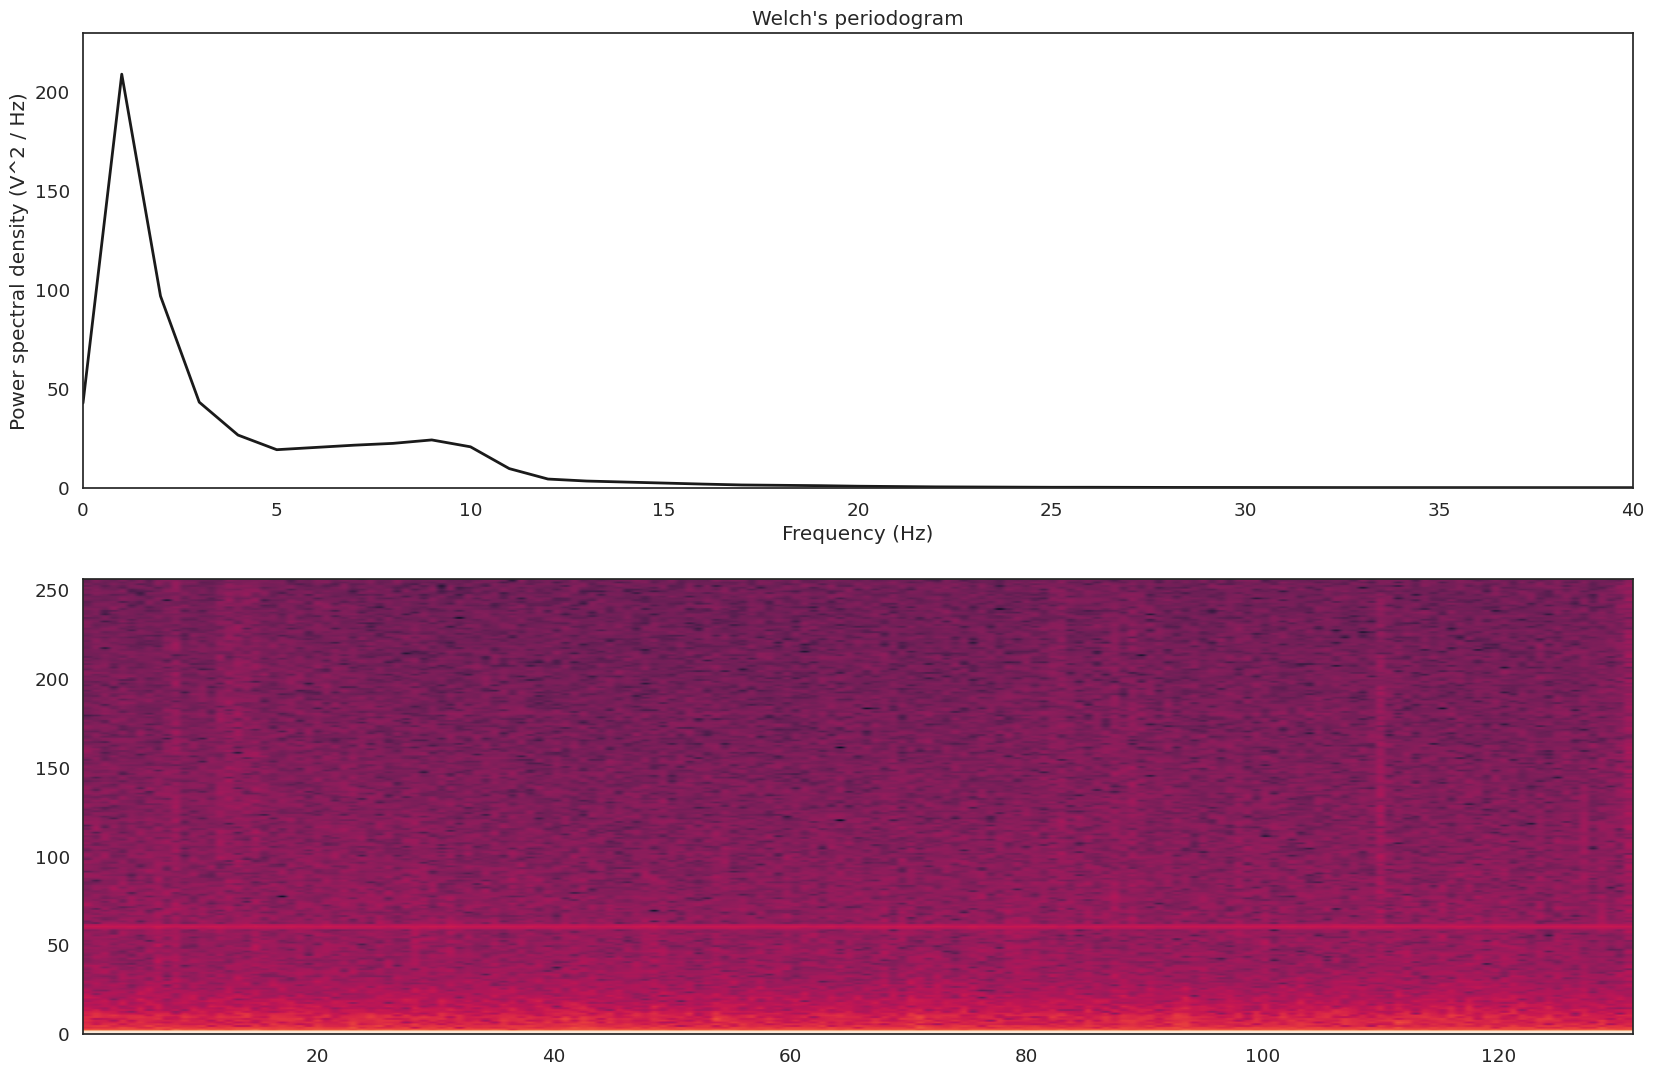

In [ ]:
def plotPSD(fileURL, channel, psdWindowSize=4):
  x, raw_signal = read_csv(fileURL, channel)
  sampleFreq = 512

  epoch = get_window(raw_signal, 0, len(raw_signal))

  # Format Raw Data
  epoch = epoch.to_numpy() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
  epoch = epoch.flatten() # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

  win = psdWindowSize * sampleFreq
  freqs, psd = signal.welch(epoch, sampleFreq, nperseg=win) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html


  fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,13))

  # Plot the power spectrum
  sns.set(font_scale=1.2, style='white')
  ax1.plot(freqs, psd, color='k', lw=2)
  ax1.set_xlabel('Frequency (Hz)')
  ax1.set_ylabel('Power spectral density (V^2 / Hz)')
  ax1.set_xlim([0, 40])
  ax1.set_ylim([0, psd.max() * 1.1])
  ax1.set_title("Welch's periodogram")
  # sns.despine()

  # Plot Spectrogram
  Pxx, freqs, bins, im = ax2.specgram(epoch, NFFT=sampleFreq, Fs=sampleFreq); # https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.specgram.html#matplotlib.axes.Axes.specgram


dataURL = "https://raw.githubusercontent.com/htil/Simple-Ganglion-BLE-App/master/data/practice_eeg_512Hz.csv"
plotPSD(dataURL, 1, 1)


**getbandPower(fileURL, channel, low, high, psdWindowSize=4)**

In [ ]:
def getbandPower(fileURL, channel, low, high, psdWindowSize=4):
  x, raw_signal = read_csv(fileURL, channel)
  sampleFreq = 512

  epoch = get_window(raw_signal, 0, len(raw_signal))

  # Format Raw Data
  epoch = epoch.to_numpy() # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html
  epoch = epoch.flatten() # https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html

  win = psdWindowSize * sampleFreq
  freqs, psd = signal.welch(epoch, sampleFreq, nperseg=win) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.welch.html

  step = freqs[1] - freqs[0];

  idx_delta = np.logical_and(freqs >= low, freqs <= high)

  psdOfInterest = psd[round(low / step): round(high / step)+1];
  freqsOfInterest = freqs[round(low / step): round(high / step)+1];

  return simps(psdOfInterest, dx=step)


def getBandPower(fileURL, channel, low, high, psdWindowSize=4):
  return getbandPower(fileURL, channel, low, high, psdWindowSize=4)

dataURL = "https://raw.githubusercontent.com/htil/Simple-Ganglion-BLE-App/master/data/practice_eeg_512Hz.csv"
print(getbandPower(dataURL, 2, 0.5, 4))
print(getbandPower(dataURL, 2, 14, 30))


505.6148878832555
15.10356824211873


getDeltaBetaBandPowerRatio(fileURL, channel)

In [ ]:
def getDeltaBetaBandPowerRatio(fileURL, channel, psdWindowSize = 4):
  return getbandPower(fileURL, channel, .5, 4, psdWindowSize) / getbandPower(fileURL, channel, 14, 30, psdWindowSize)

dataURL = "https://raw.githubusercontent.com/htil/Simple-Ganglion-BLE-App/master/data/practice_eeg_512Hz.csv"
getDeltaBetaBandPowerRatio(dataURL, 2)

33.476518911158166

**GetRelativeBandPower(fileURL, channel low, high, psdWindowSize = 4)**

In [ ]:
def GetRelativeBandPower(fileURL, channel, low, high, psdWindowSize = 4):
  return getbandPower(fileURL, channel, low, high, psdWindowSize) / getbandPower(fileURL, channel, 0.5, 30, psdWindowSize)

dataURL = "https://raw.githubusercontent.com/htil/Simple-Ganglion-BLE-App/master/data/practice_eeg_512Hz.csv"
print(GetRelativeBandPower(dataURL, 2, 0.5, 4))
print(GetRelativeBandPower(dataURL, 2, 4, 8))
print(GetRelativeBandPower(dataURL, 2, 8, 13))
print(GetRelativeBandPower(dataURL, 2, 14, 30))

0.7345972894720716
0.12790110662518744
0.11086512802545744
0.02194365822269593
